<a href="https://colab.research.google.com/github/cepdnaclk/e18-4yp-Predicting-Forex-Currency-Exchange-Rate-using-Machine-Learning/blob/main/models/GBPUSD/GBPUSD_IN1_LSTM_GRID_Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=94bc4f7ed5d6c421edfa508cd008417799525773fa346c0cc75e85ac5a35a8ef
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas as pd
import pandas_ta as ta

data = pd.read_csv('GBPUSD=X.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-04,1.258384,1.259287,1.257055,1.258273,1.258273,0
1,2019-07-05,1.258336,1.258701,1.248299,1.258305,1.258305,0
2,2019-07-08,1.252615,1.254076,1.250125,1.252552,1.252552,0
3,2019-07-09,1.251878,1.252035,1.244122,1.251643,1.251643,0
4,2019-07-10,1.245733,1.252113,1.244524,1.245858,1.245858,0
...,...,...,...,...,...,...,...
1301,2024-06-28,1.264382,1.266175,1.262021,1.264574,1.264574,0
1302,2024-07-01,1.265022,1.269535,1.263743,1.264862,1.264862,0
1303,2024-07-02,1.264622,1.268536,1.261639,1.264574,1.264574,0
1304,2024-07-03,1.268810,1.277710,1.267909,1.269036,1.269036,0


In [ ]:
data['T-4'] = data['Close']
data['T-3'] = data['Close'].shift(-1)
data['T-2'] = data['Close'].shift(-2)
data['T-1'] = data['Close'].shift(-3)
data['T0'] = data['Close'].shift(-4)

data['SMA_5_H'] = ta.sma(data['High'], length=5).shift(-4)
data['SMA_5_L'] = ta.sma(data['Low'], length=5).shift(-4)
data['EMA_5_C'] = ta.ema(data['Close'], length=5).shift(-4)
data['RSI'] = ta.rsi(data['Close'], length=14).shift(-14)

#Closing value of the next day
data['T_F'] = data['Close'].shift(-5)

print(data.head(10))


         Date      Open      High       Low     Close  Adj Close  Volume  \
0  2019-07-04  1.258384  1.259287  1.257055  1.258273   1.258273       0   
1  2019-07-05  1.258336  1.258701  1.248299  1.258305   1.258305       0   
2  2019-07-08  1.252615  1.254076  1.250125  1.252552   1.252552       0   
3  2019-07-09  1.251878  1.252035  1.244122  1.251643   1.251643       0   
4  2019-07-10  1.245733  1.252113  1.244524  1.245858   1.245858       0   
5  2019-07-11  1.250625  1.257229  1.250625  1.250813   1.250813       0   
6  2019-07-12  1.252270  1.256266  1.252270  1.252348   1.252348       0   
7  2019-07-15  1.257229  1.257640  1.251189  1.257197   1.257197       0   
8  2019-07-16  1.252035  1.252035  1.239741  1.251799   1.251799       0   
9  2019-07-17  1.240880  1.243936  1.238344  1.241203   1.241203       0   

        T-4       T-3       T-2       T-1        T0   SMA_5_H   SMA_5_L  \
0  1.258273  1.258305  1.252552  1.251643  1.245858  1.255242  1.248825   
1  1.258305  

In [ ]:
print(data.tail(10))

            Date      Open      High       Low     Close  Adj Close  Volume  \
1296  2024-06-21  1.266047  1.266978  1.262563  1.266047   1.266047       0   
1297  2024-06-24  1.263967  1.269841  1.263360  1.263903   1.263903       0   
1298  2024-06-25  1.268311  1.270245  1.267154  1.268343   1.268343       0   
1299  2024-06-26  1.268472  1.269197  1.262084  1.268400   1.268400       0   
1300  2024-06-27  1.262148  1.266945  1.261352  1.262180   1.262180       0   
1301  2024-06-28  1.264382  1.266175  1.262021  1.264574   1.264574       0   
1302  2024-07-01  1.265022  1.269535  1.263743  1.264862   1.264862       0   
1303  2024-07-02  1.264622  1.268536  1.261639  1.264574   1.264574       0   
1304  2024-07-03  1.268810  1.277710  1.267909  1.269036   1.269036       0   
1305  2024-07-04  1.274486  1.276732  1.274177  1.276308   1.276308       0   

           T-4       T-3       T-2       T-1        T0   SMA_5_H   SMA_5_L  \
1296  1.266047  1.263903  1.268343  1.268400  1.2621

In [ ]:
# Dropping NaN values
data.dropna(inplace=True)

print(data.tail(10))


            Date      Open      High       Low     Close  Adj Close  Volume  \
1282  2024-06-03  1.274405  1.279394  1.269551  1.274372   1.274372       0   
1283  2024-06-04  1.281017  1.281723  1.274437  1.281017   1.281017       0   
1284  2024-06-05  1.277302  1.279525  1.275771  1.277302   1.277302       0   
1285  2024-06-06  1.279394  1.281066  1.276552  1.279476   1.279476       0   
1286  2024-06-07  1.279427  1.281082  1.271747  1.279329   1.279329       0   
1287  2024-06-10  1.272870  1.273237  1.268907  1.272945   1.272945       0   
1288  2024-06-11  1.272588  1.274941  1.270761  1.272637   1.272637       0   
1289  2024-06-12  1.273837  1.286008  1.273360  1.274048   1.274048       0   
1290  2024-06-13  1.279673  1.280607  1.275283  1.279623   1.279623       0   
1291  2024-06-14  1.275445  1.276487  1.265807  1.275510   1.275510       0   

           T-4       T-3       T-2       T-1        T0   SMA_5_H   SMA_5_L  \
1282  1.274372  1.281017  1.277302  1.279476  1.2793

In [ ]:
data = data[['Date', 'T-4','T-3','T-2','T-1','T0','SMA_5_H','SMA_5_L','EMA_5_C','RSI','T_F']]

data

,Date,T-4,T-3,T-2,T-1,T0,SMA_5_H,SMA_5_L,EMA_5_C,RSI,T_F
0,2019-07-04,1.258273,1.258305,1.252552,1.251643,1.245858,1.255242,1.248825,1.253326,38.986487,1.250813
1,2019-07-05,1.258305,1.252552,1.251643,1.245858,1.250813,1.254831,1.247539,1.252488,45.472080,1.252348
2,2019-07-08,1.252552,1.251643,1.245858,1.250813,1.252348,1.254344,1.248333,1.252442,42.130046,1.257197
3,2019-07-09,1.251643,1.245858,1.250813,1.252348,1.257197,1.255057,1.248546,1.254027,35.495401,1.251799
4,2019-07-10,1.245858,1.250813,1.252348,1.257197,1.251799,1.255057,1.247670,1.253284,26.256917,1.241203
...,...,...,...,...,...,...,...,...,...,...,...
1287,2024-06-10,1.272945,1.272637,1.274048,1.279623,1.275510,1.278256,1.270824,1.276087,44.942364,1.268311
1288,2024-06-11,1.272637,1.274048,1.279623,1.275510,1.268311,1.277425,1.270239,1.273495,45.312032,1.271600
1289,2024-06-12,1.274048,1.279623,1.275510,1.268311,1.271600,1.276845,1.269476,1.272863,44.986748,1.270745
1290,2024-06-13,1.279623,1.275510,1.268311,1.271600,1.270745,1.274443,1.268853,1.272157,50.871227,1.272200


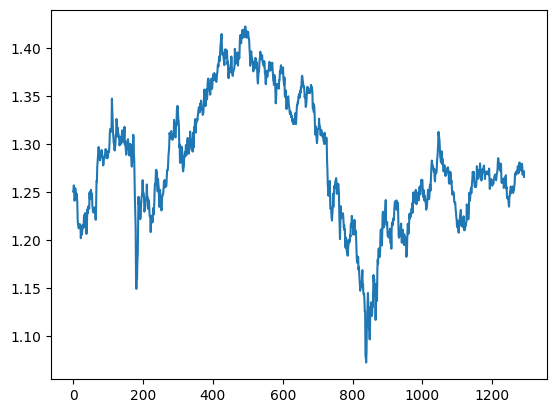

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['T_F'])

In [ ]:
dates=data['Date'].to_numpy()
middle_matrix =data[['T-4','T-3','T-2','T-1','T0','SMA_5_H','SMA_5_L','EMA_5_C','RSI']].to_numpy()
X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
Y=data['T_F']

print(dates.shape)
print(X.shape)
print(Y.shape)

(1292,)
(1292, 9, 1)
(1292,)


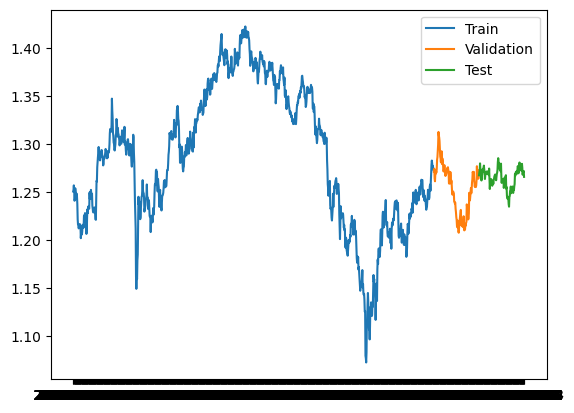

In [ ]:
q_80 = int(len(dates) * .8) #change to 0.8
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], Y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], Y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import layers

# # model = Sequential([layers.Input((9, 1)),
# #                     layers.LSTM(300),
# #                     layers.Dense(1)])

# model = Sequential([layers.Input((9, 1)),
#                    layers.LSTM(64),
#                    layers.Dense(10, activation='relu'),
#                    layers.Dense(10, activation='relu'),
#                    layers.Dense(1)])

# model.compile(loss='mse',
#               optimizer=Adam(learning_rate=0.01),
#               metrics=['mean_absolute_error'])

# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Define different parameter values to iterate over
epochs_values = [100, 150]
lstm_units_values = [120, 150, 200]
learning_rate_values = [0.01, 0.001, 0.0001]
dense1_values = [100, 150, 200]
dense2_values = [100, 150, 200]

best_loss = float('inf')
best_epochs = None
best_lstm_units = None
best_learning_rate = None
best_dense2 = None
best_dense1 = None
hist = []

# Define X_train, y_train, X_val, y_val

# Loop over different parameter combinations
for epochs in epochs_values:
    for lstm_units in lstm_units_values:
        for learning_rate in learning_rate_values:
          for dense1 in dense1_values:
            for dense2 in dense2_values:
                print(f"Training model with epochs={epochs}, lstm_units={lstm_units}, learning_rate={learning_rate}")

                # model = Sequential([layers.Input((9, 1)),
                #         layers.LSTM(lstm_units),
                #         layers.Dense(1)])

                # Define the model
                model = Sequential([
                    layers.Input((9, 1)),
                    layers.LSTM(lstm_units),
                    layers.Dense(dense1, activation='relu'),
                    layers.Dense(dense2, activation='relu'),
                    layers.Dense(1)
                ])

                model.compile(loss='mse',
                              optimizer=Adam(learning_rate=learning_rate),
                              metrics=['mean_absolute_error'])

                # Train the model
                history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0)

                # Check if this combination has the best validation loss so far
                if history.history['loss'][-1] < best_loss:
                    hist = history.history
                    best_loss = history.history['loss'][-1]
                    best_epochs = epochs
                    best_lstm_units = lstm_units
                    best_learning_rate = learning_rate
                    best_dense1 = dense1
                    best_dense2 = dense2

# Print the best combination
print(f"Best combination: epochs={best_epochs}, lstm_units={best_lstm_units}, learning_rate={best_learning_rate}, Validation Loss={best_loss}, best_dense1={best_dense1}, best_dense2={best_dense2}")

# # Add labels and legend
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# # plt.legend()
# plt.show()


Training model with epochs=100, lstm_units=120, learning_rate=0.01
Training model with epochs=100, lstm_units=120, learning_rate=0.01
Training model with epochs=100, lstm_units=120, learning_rate=0.01
Training model with epochs=100, lstm_units=120, learning_rate=0.01
Training model with epochs=100, lstm_units=120, learning_rate=0.01
Training model with epochs=100, lstm_units=120, learning_rate=0.01
Training model with epochs=100, lstm_units=120, learning_rate=0.01
Training model with epochs=100, lstm_units=120, learning_rate=0.01
Training model with epochs=100, lstm_units=120, learning_rate=0.01
Training model with epochs=100, lstm_units=120, learning_rate=0.001
Training model with epochs=100, lstm_units=120, learning_rate=0.001
Training model with epochs=100, lstm_units=120, learning_rate=0.001
Training model with epochs=100, lstm_units=120, learning_rate=0.001
Training model with epochs=100, lstm_units=120, learning_rate=0.001
Training model with epochs=100, lstm_units=120, learning_

Epoch 1/100
33/33 [==============================] - 4s 33ms/step - loss: 0.1871 - mean_absolute_error: 0.2579 - val_loss: 0.0077 - val_mean_absolute_error: 0.0827
Epoch 2/100
33/33 [==============================] - 1s 26ms/step - loss: 0.0060 - mean_absolute_error: 0.0638 - val_loss: 0.0023 - val_mean_absolute_error: 0.0416
Epoch 3/100
33/33 [==============================] - 1s 26ms/step - loss: 0.0050 - mean_absolute_error: 0.0585 - val_loss: 0.0039 - val_mean_absolute_error: 0.0571
Epoch 4/100
33/33 [==============================] - 1s 26ms/step - loss: 0.0052 - mean_absolute_error: 0.0601 - val_loss: 0.0017 - val_mean_absolute_error: 0.0345
Epoch 5/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0044 - mean_absolute_error: 0.0551 - val_loss: 0.0023 - val_mean_absolute_error: 0.0426
Epoch 6/100
33/33 [==============================] - 0s 13ms/step - loss: 0.0031 - mean_absolute_error: 0.0463 - val_loss: 2.7792e-04 - val_mean_absolute_error: 0.0128
Epoch 7/100


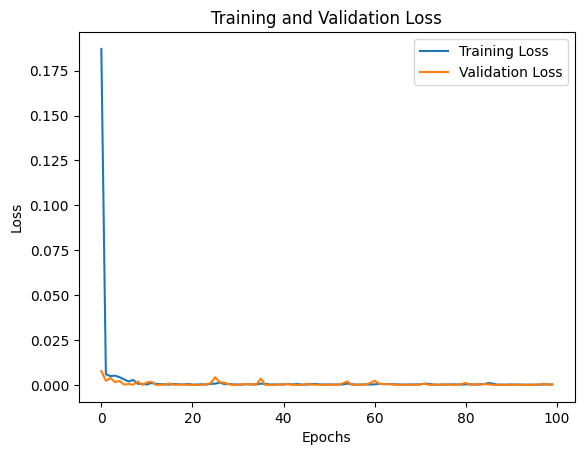

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# model = Sequential([layers.Input((9, 1)),
#                     layers.LSTM(64),
#                     layers.Dense(1)])

model = Sequential([layers.Input((9, 1)),
                   layers.LSTM(120),
                   layers.Dense(100, activation='relu'),
                   layers.Dense(150, activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.01),
              metrics=['mean_absolute_error'])


history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

print(history.history.keys())

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

33/33 [==============================] - 1s 5ms/step


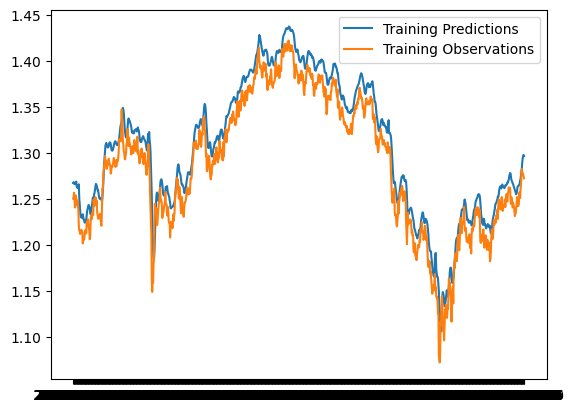

In [ ]:
from sklearn.metrics import mean_squared_error

train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

195.17621468114777


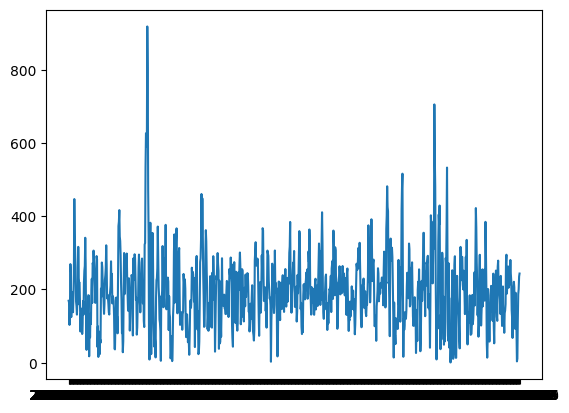

In [ ]:
import numpy as np

basis_point_value=0.0001  #For GBPUSD pair
train_data_basis_point_diff=((train_predictions/basis_point_value).flatten()-y_train/basis_point_value).abs()
plt.plot(dates_train, train_data_basis_point_diff)

average_train_data_basis_point_diff=np.mean(train_data_basis_point_diff)
print(average_train_data_basis_point_diff)

5/5 [==============================] - 0s 8ms/step


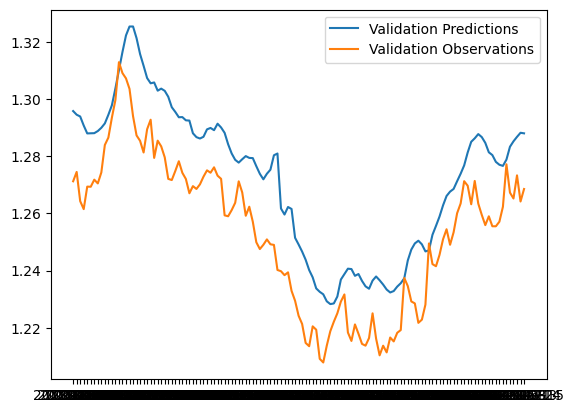

In [ ]:
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

186.9748407218998


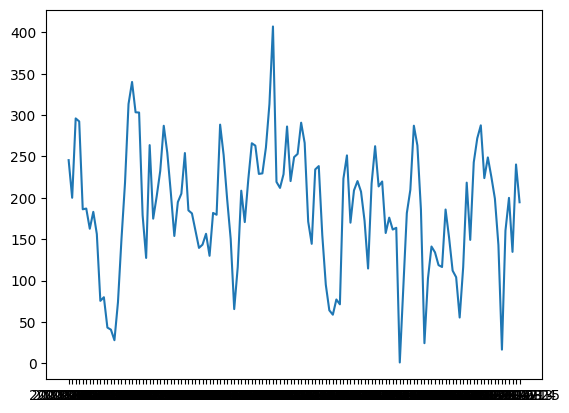

In [ ]:
basis_point_value=0.0001  #For GBPUSD pair
validation_data_basis_point_diff=((val_predictions/basis_point_value).flatten()-y_val/basis_point_value).abs()
plt.plot(dates_val, validation_data_basis_point_diff)

print(np.mean(validation_data_basis_point_diff))

5/5 [==============================] - 0s 5ms/step


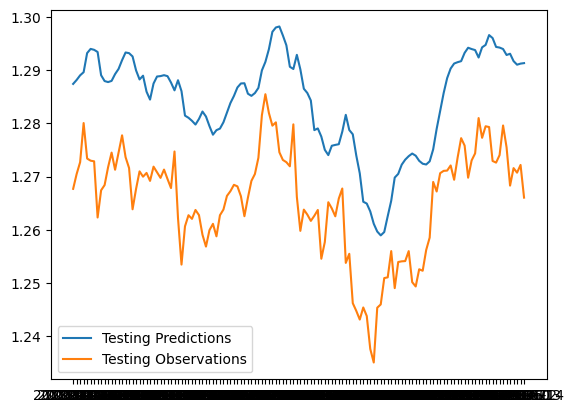

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Assuming test_predictions and y_test are lists or numpy arrays
# Calculate MSE and MAE
mse = mean_squared_error(y_test, test_predictions)
print("Mean Square Error:", mse)
mae=mean_absolute_error(y_test, test_predictions)
print("Mean Absolute Error:", mae)

Mean Square Error: 0.0003735536346449386
Mean Absolute Error: 0.018608450333345856


186.08483503605834


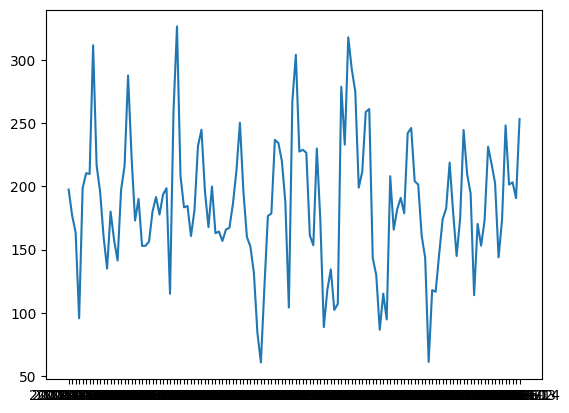

In [ ]:
basis_point_value=0.0001  #For GBPUSD pair
test_data_basis_point_diff=((test_predictions/basis_point_value).flatten()-y_test/basis_point_value).abs()
plt.plot(dates_test, test_data_basis_point_diff)

print(np.mean(test_data_basis_point_diff))

In [ ]:
#Start Trading with 1000 LKR with model


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_predictions[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_predictions[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)


130
1003.5497357418948
base


In [ ]:
#Start Trading with 1000 USD LKR actual values


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_data[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_data[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)

130
1188.1318796891615
quote


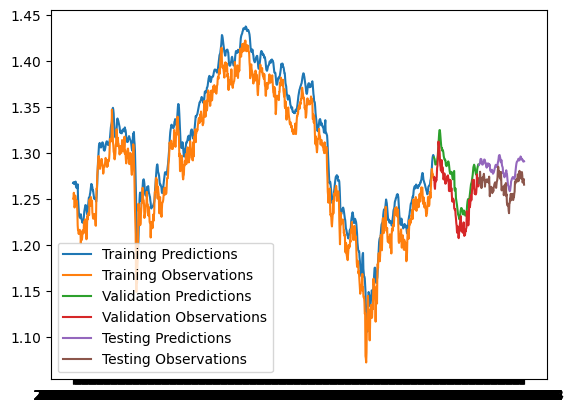

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
model.save('GPBUSD_model.h5')

In [ ]:
pip install flask
pip install tensorflow

SyntaxError: invalid syntax (<ipython-input-25-f776bebd23b6>, line 1)

In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras import models

app = Flask(__name__)

# Load the model
model = models.load_model('GBPUSD_model.h5')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    # Assuming your model expects input in a specific format, adjust as needed
    input_data = data['input']
    prediction = model.predict(input_data)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


OSError: No file or directory found at GBPUSD_model.h5